## Sentiment Prediction for Migration Tweets

- Using the VADER model which has been shown to outperform LIWC, SentiWordNet, and other machine learning techniques. Moreover, it is well suited for social media data especially Twitter.
- Original paper was published in a top-tier conference (ICWSM): http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
- Using the package they released: https://github.com/cjhutto/vaderSentiment

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Final-Project/20190313_TW_Migrant-Migration.csv')
df.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1.102720e+18,darleneclarke5,"RT @ezralevant: Abdul Habash, a Syrian migrant...",Mon Mar 04 23:59:47 +0000 2019,04/03/2019 23:59:47,NaN,en,NaN,NaN,5.642576e+08,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,197,579.0,NaN,http://twitter.com/darleneclarke5/statuses/110...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1.102720e+18,BlueelvisEric,RT @1776Stonewall: https://t.co/CyucESMlFM Te...,Mon Mar 04 23:59:40 +0000 2019,04/03/2019 23:59:40,NaN,en,NaN,NaN,3.109106e+09,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1062099415...,940,225.0,top your momma,http://twitter.com/BlueelvisEric/statuses/1102...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1.102720e+18,Potus16Abe,RT @EmeraldRobinson: Trump's base was promised...,Mon Mar 04 23:59:38 +0000 2019,04/03/2019 23:59:38,NaN,en,NaN,NaN,1.083790e+18,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1083792878...,103,275.0,NaN,http://twitter.com/Potus16Abe/statuses/1102720...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
3,1.102720e+18,soozbo,RT @AnjaKolibri: Australian humpback #whale po...,Mon Mar 04 23:59:34 +0000 2019,04/03/2019 23:59:34,NaN,en,NaN,NaN,7.967720e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1061628259...,718,869.0,NaN,http://twitter.com/soozbo/statuses/11027202687...,"{""hashtags"":[{""text"":""whale"",""indices"":[37,43]..."
4,1.102720e+18,jp_dutch,RT @NinaDSchick: In what should come as no sur...,Mon Mar 04 23:59:32 +0000 2019,04/03/2019 23:59:32,NaN,en,NaN,NaN,1.056307e+08,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000007...,666,481.0,Netherlands,http://twitter.com/jp_dutch/statuses/110272026...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


##### id_str is not unique; creating a unique ID variable for each tweet

In [3]:
df.reset_index(inplace=True)
df.rename(columns={'index':'tweetID'}, inplace=True)
df.head()

,tweetID,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,0,1.102720e+18,darleneclarke5,"RT @ezralevant: Abdul Habash, a Syrian migrant...",Mon Mar 04 23:59:47 +0000 2019,04/03/2019 23:59:47,NaN,en,NaN,NaN,5.642576e+08,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,197,579.0,NaN,http://twitter.com/darleneclarke5/statuses/110...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1,1.102720e+18,BlueelvisEric,RT @1776Stonewall: https://t.co/CyucESMlFM Te...,Mon Mar 04 23:59:40 +0000 2019,04/03/2019 23:59:40,NaN,en,NaN,NaN,3.109106e+09,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1062099415...,940,225.0,top your momma,http://twitter.com/BlueelvisEric/statuses/1102...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,2,1.102720e+18,Potus16Abe,RT @EmeraldRobinson: Trump's base was promised...,Mon Mar 04 23:59:38 +0000 2019,04/03/2019 23:59:38,NaN,en,NaN,NaN,1.083790e+18,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1083792878...,103,275.0,NaN,http://twitter.com/Potus16Abe/statuses/1102720...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
3,3,1.102720e+18,soozbo,RT @AnjaKolibri: Australian humpback #whale po...,Mon Mar 04 23:59:34 +0000 2019,04/03/2019 23:59:34,NaN,en,NaN,NaN,7.967720e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1061628259...,718,869.0,NaN,http://twitter.com/soozbo/statuses/11027202687...,"{""hashtags"":[{""text"":""whale"",""indices"":[37,43]..."
4,4,1.102720e+18,jp_dutch,RT @NinaDSchick: In what should come as no sur...,Mon Mar 04 23:59:32 +0000 2019,04/03/2019 23:59:32,NaN,en,NaN,NaN,1.056307e+08,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000007...,666,481.0,Netherlands,http://twitter.com/jp_dutch/statuses/110272026...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [4]:
map_ID_text = dict((tuple(x) for x in df[['tweetID', 'text']].values))

In [5]:
analyzer = SentimentIntensityAnalyzer()

map_ID_valence_dict = {}

for ID, text in map_ID_text.items():
    map_ID_valence_dict[ID] = analyzer.polarity_scores(text)

In [6]:
print(map_ID_valence_dict[1500]) # preview VADER's output dictionary
print(map_ID_text[1500]) # corresponding text

{'neg': 0.037, 'neu': 0.78, 'pos': 0.183, 'compound': 0.8377}
@LindaDePaola1 @HillaryClinton @fams2gether @ACLU @CBP what a bunch of morons trump supporters are. Trump IS BREAKING the RULE of Law in our country in regards to immigration. What about the chain migration he is against? I guess it is alright when it is his wife?? Good enough for her, good enough for people seeking asylum.


In [7]:
map_ID_senti_score = {} # Mapping IDs to a single score 'combined'

for ID, val in map_ID_valence_dict.items():
    map_ID_senti_score[ID] = val['compound']

### Plot it:

Text(0.5, 1.0, 'Considering All Tweets')

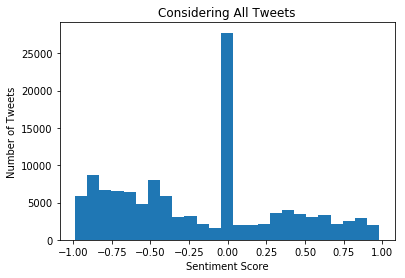

In [8]:
plt.hist(list(map_ID_senti_score.values()), bins=25)
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment Score')
plt.title('Considering All Tweets')

## Pick thresholds:
- This 'combined' is a weighted average of 'pos', 'neg', 'neu'. It can take values between -1 and 1.
- Original paper uses 0.05 and -0.05 as +ve and -ve thresholds respectively. But if we want 5 categories (instead of 3), our thresholds could be something like:

    - x < -0.8 (Very Negative tweet)
    - -0.8 < x < -0.05 (Negative tweet)
    - -0.05 < x < 0.05 (Neutral tweet)
    - 0.05 < x < 0.8 (Positive tweet)
    - x > 0.8 (Very Positive tweet)
    
- Could also change the conditions. For eg: label it positive only if 'neg' is less than 0.


## Filtering Retweets from the analysis
- Because that might not count as an original opinion.

In [9]:
map_ID_sentiment = {} # Does not include any retweets

for ID, text in map_ID_text.items():
    if text.startswith('RT'): # skip retweets
        continue
    temp = analyzer.polarity_scores(text)
    map_ID_sentiment[ID] = temp['compound']

Text(0.5, 1.0, 'Does not include Retweets')

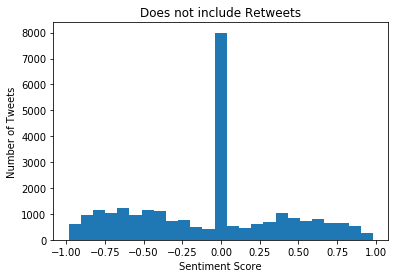

In [10]:
# Plot it:
plt.hist(list(map_ID_sentiment.values()), bins=25)
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment Score')
plt.title('Does not include Retweets')

### Add sentiment score to DataFrame:

In [11]:
df['SentiScore_VADER'] = df['tweetID'].map(map_ID_senti_score)
df.head()

,tweetID,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,SentiScore_VADER
0,0,1.102720e+18,darleneclarke5,"RT @ezralevant: Abdul Habash, a Syrian migrant...",Mon Mar 04 23:59:47 +0000 2019,04/03/2019 23:59:47,NaN,en,NaN,NaN,5.642576e+08,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,197,579.0,NaN,http://twitter.com/darleneclarke5/statuses/110...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",-0.9403
1,1,1.102720e+18,BlueelvisEric,RT @1776Stonewall: https://t.co/CyucESMlFM Te...,Mon Mar 04 23:59:40 +0000 2019,04/03/2019 23:59:40,NaN,en,NaN,NaN,3.109106e+09,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1062099415...,940,225.0,top your momma,http://twitter.com/BlueelvisEric/statuses/1102...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",-0.3612
2,2,1.102720e+18,Potus16Abe,RT @EmeraldRobinson: Trump's base was promised...,Mon Mar 04 23:59:38 +0000 2019,04/03/2019 23:59:38,NaN,en,NaN,NaN,1.083790e+18,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1083792878...,103,275.0,NaN,http://twitter.com/Potus16Abe/statuses/1102720...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.6908
3,3,1.102720e+18,soozbo,RT @AnjaKolibri: Australian humpback #whale po...,Mon Mar 04 23:59:34 +0000 2019,04/03/2019 23:59:34,NaN,en,NaN,NaN,7.967720e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1061628259...,718,869.0,NaN,http://twitter.com/soozbo/statuses/11027202687...,"{""hashtags"":[{""text"":""whale"",""indices"":[37,43]...",-0.1531
4,4,1.102720e+18,jp_dutch,RT @NinaDSchick: In what should come as no sur...,Mon Mar 04 23:59:32 +0000 2019,04/03/2019 23:59:32,NaN,en,NaN,NaN,1.056307e+08,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000007...,666,481.0,Netherlands,http://twitter.com/jp_dutch/statuses/110272026...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",-0.8316


#### Possible TODOs for next week:
- Take a small sample, manually annotate, and compare with VADER (validation).
- Do word clouds for the tweets.
- Check if negative tweets are more likely to be retweeted (the graphs hint at it).
- Create network graphs.